# Load Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd drive/MyDrive/Thesis/Paper2

/content/drive/MyDrive/Thesis/Paper2


# Imports + Load Data

In [3]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import makedata        # to get the CIFAR10 data in the required format
import models

In [4]:
totalClass = 6
shufflePixels = True
shuffleLabels = False

In [5]:
# Load data
x_train, y_train, x_test, y_test, a, b = makedata.cifar(totalClass, shufflePixels)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

loaded data_batch_1
len of data_batch_1 :  10000
len of training data  10000
loaded data_batch_2
len of data_batch_2 :  10000
len of training data  20000
loaded data_batch_3
len of data_batch_3 :  10000
len of training data  30000
loaded data_batch_4
len of data_batch_4 :  10000
len of training data  40000
loaded data_batch_5
len of data_batch_5 :  10000
len of training data  50000
(30000, 32, 32, 3)
(30000, 32, 32, 3)
(30000, 6)
(6000, 32, 32, 3)
(6000, 6)


Populating the interactive namespace from numpy and matplotlib


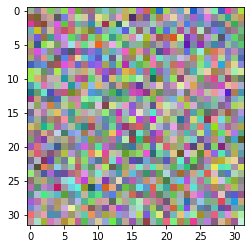

In [6]:
# Check Image data
im = x_train[88]
%pylab inline
imgplot = plt.imshow(im)
plt.show()

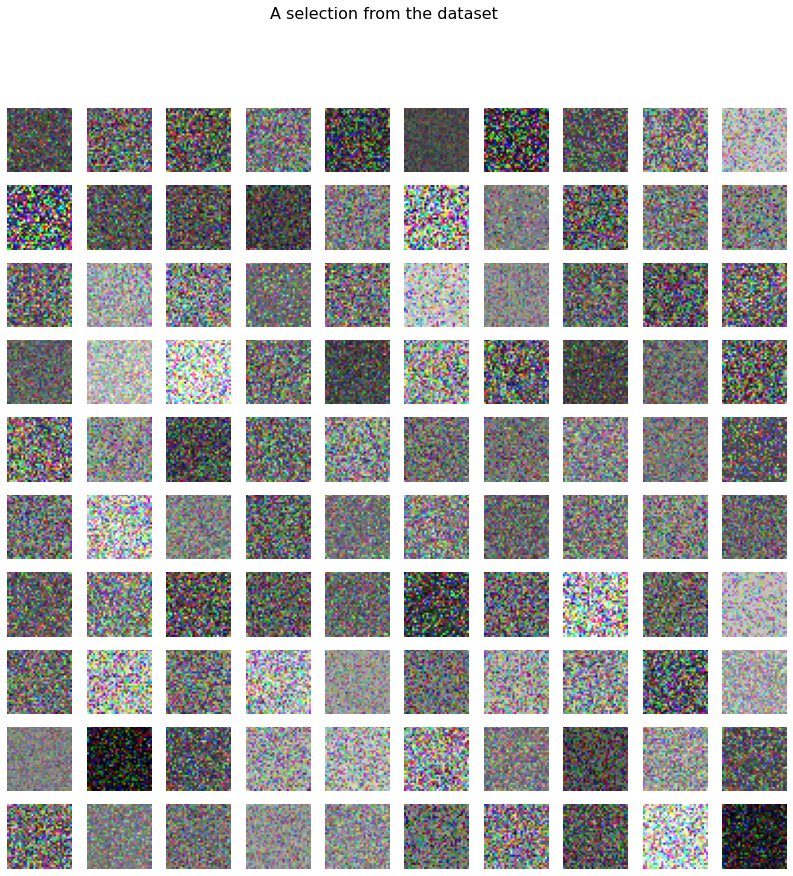

In [7]:
fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(14, 14))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(x_train[idx], cmap=plt.cm.binary)
    ax.axis("off")
_ = fig.suptitle("A selection from the dataset", fontsize=16)

#VGG16

In [8]:
vgg16 = models.vgg16(totalClass)
vgg16.compile(
    loss='categorical_crossentropy', 
    optimizer='SGD', 
    metrics=['accuracy'])

In [9]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = vgg16.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = vgg16.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
59/59 [==============================] - 13s 45ms/step - loss: 1.7913 - accuracy: 0.1666
test loss, test acc: [1.7912729978561401, 0.16660000383853912]
Evaluate on test data
12/12 [==============================] - 1s 116ms/step - loss: 1.7909 - accuracy: 0.1660
test loss, test acc: [1.7908844947814941, 0.16599999368190765]


In [10]:
vggResults = vgg16.fit(x_train,y_train,
                       batch_size=100,
                       epochs=250,
                       validation_data=(x_test, y_test))

Epoch 1/250
300/300 [==============================] - 12s 33ms/step - loss: 1.7535 - accuracy: 0.2224 - val_loss: 1.7192 - val_accuracy: 0.2548
Epoch 2/250
300/300 [==============================] - 10s 32ms/step - loss: 1.7251 - accuracy: 0.2480 - val_loss: 1.7022 - val_accuracy: 0.2668
Epoch 3/250
300/300 [==============================] - 10s 32ms/step - loss: 1.7157 - accuracy: 0.2621 - val_loss: 1.6942 - val_accuracy: 0.2755
Epoch 4/250
300/300 [==============================] - 10s 32ms/step - loss: 1.7059 - accuracy: 0.2745 - val_loss: 1.6915 - val_accuracy: 0.2660
Epoch 5/250
300/300 [==============================] - 10s 32ms/step - loss: 1.7019 - accuracy: 0.2734 - val_loss: 1.6932 - val_accuracy: 0.2788
Epoch 6/250
300/300 [==============================] - 10s 32ms/step - loss: 1.6964 - accuracy: 0.2815 - val_loss: 1.7066 - val_accuracy: 0.2683
Epoch 7/250
300/300 [==============================] - 10s 32ms/step - loss: 1.6909 - accuracy: 0.2845 - val_loss: 1.6764 - val_ac

In [11]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = vgg16.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = vgg16.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
59/59 [==============================] - 2s 32ms/step - loss: 2.1708e-05 - accuracy: 1.0000
test loss, test acc: [2.170829611713998e-05, 1.0]
Evaluate on test data
12/12 [==============================] - 0s 31ms/step - loss: 11.0012 - accuracy: 0.2002
test loss, test acc: [11.001194953918457, 0.20016667246818542]


# Small

In [12]:
small = models.small(totalClass)
small.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-06),
            loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = small.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = small.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
59/59 [==============================] - 1s 9ms/step - loss: 19.7690 - accuracy: 0.1628
test loss, test acc: [19.76897621154785, 0.16279999911785126]
Evaluate on test data
12/12 [==============================] - 0s 16ms/step - loss: 19.9037 - accuracy: 0.1625
test loss, test acc: [19.903663635253906, 0.16249999403953552]


In [14]:
smallResults = small.fit(x_train, y_train, 
                         batch_size=100, 
                         epochs=250, 
                         validation_data=(x_test, y_test))

Epoch 1/250
300/300 [==============================] - 4s 9ms/step - loss: 3.7145 - accuracy: 0.1887 - val_loss: 1.7587 - val_accuracy: 0.2432
Epoch 2/250
300/300 [==============================] - 3s 9ms/step - loss: 1.7623 - accuracy: 0.2187 - val_loss: 1.7393 - val_accuracy: 0.2468
Epoch 3/250
300/300 [==============================] - 3s 9ms/step - loss: 1.7485 - accuracy: 0.2264 - val_loss: 1.7261 - val_accuracy: 0.2377
Epoch 4/250
300/300 [==============================] - 2s 8ms/step - loss: 1.7397 - accuracy: 0.2302 - val_loss: 1.7213 - val_accuracy: 0.2477
Epoch 5/250
300/300 [==============================] - 3s 9ms/step - loss: 1.7371 - accuracy: 0.2307 - val_loss: 1.7261 - val_accuracy: 0.2548
Epoch 6/250
300/300 [==============================] - 3s 9ms/step - loss: 1.7346 - accuracy: 0.2326 - val_loss: 1.7193 - val_accuracy: 0.2600
Epoch 7/250
300/300 [==============================] - 2s 8ms/step - loss: 1.7304 - accuracy: 0.2370 - val_loss: 1.7367 - val_accuracy: 0.2397

In [15]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = small.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = small.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
59/59 [==============================] - 0s 8ms/step - loss: 1.2496 - accuracy: 0.5382
test loss, test acc: [1.2495908737182617, 0.5382333397865295]
Evaluate on test data
12/12 [==============================] - 0s 7ms/step - loss: 1.9732 - accuracy: 0.2208
test loss, test acc: [1.9731903076171875, 0.22083333134651184]


#tNet

In [16]:
tNet = models.tNet(totalClass)
tNet.compile(
    loss='categorical_crossentropy', 
    optimizer='SGD', 
    metrics=['accuracy'])

In [17]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = tNet.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = tNet.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
59/59 [==============================] - 4s 49ms/step - loss: 2.3784 - accuracy: 0.1651
test loss, test acc: [2.378417730331421, 0.16513332724571228]
Evaluate on test data
12/12 [==============================] - 1s 86ms/step - loss: 2.3684 - accuracy: 0.1650
test loss, test acc: [2.368417978286743, 0.16500000655651093]


In [18]:
tNetResults = tNet.fit(x_train,y_train,
                       batch_size=100,
                       epochs=250,
                       validation_data=(x_test, y_test))

Epoch 1/250
300/300 [==============================] - 15s 42ms/step - loss: 1.8029 - accuracy: 0.2556 - val_loss: 1.6857 - val_accuracy: 0.2785
Epoch 2/250
300/300 [==============================] - 12s 41ms/step - loss: 1.6615 - accuracy: 0.3027 - val_loss: 1.6808 - val_accuracy: 0.2835
Epoch 3/250
300/300 [==============================] - 12s 41ms/step - loss: 1.5886 - accuracy: 0.3416 - val_loss: 1.6929 - val_accuracy: 0.2835
Epoch 4/250
300/300 [==============================] - 13s 43ms/step - loss: 1.4850 - accuracy: 0.4019 - val_loss: 1.7449 - val_accuracy: 0.2830
Epoch 5/250
300/300 [==============================] - 12s 41ms/step - loss: 1.3430 - accuracy: 0.4709 - val_loss: 1.8323 - val_accuracy: 0.2608
Epoch 6/250
300/300 [==============================] - 13s 43ms/step - loss: 1.1607 - accuracy: 0.5607 - val_loss: 1.9800 - val_accuracy: 0.2592
Epoch 7/250
300/300 [==============================] - 12s 41ms/step - loss: 0.9588 - accuracy: 0.6531 - val_loss: 2.1325 - val_ac

In [19]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = tNet.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = tNet.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
59/59 [==============================] - 2s 41ms/step - loss: 0.0080 - accuracy: 0.9988
test loss, test acc: [0.008039032109081745, 0.9987666606903076]
Evaluate on test data
12/12 [==============================] - 1s 43ms/step - loss: 5.6214 - accuracy: 0.2548
test loss, test acc: [5.621372222900391, 0.2548333406448364]


# ConvNet

In [20]:
convNet = models.convNet(totalClass)
convNet.compile(
    loss='categorical_crossentropy', 
    optimizer='SGD', 
    metrics=['accuracy'])

In [21]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = convNet.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = convNet.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
59/59 [==============================] - 7s 71ms/step - loss: 2.4694 - accuracy: 0.1675
test loss, test acc: [2.4694111347198486, 0.1674666702747345]
Evaluate on test data
12/12 [==============================] - 2s 185ms/step - loss: 2.4629 - accuracy: 0.1697
test loss, test acc: [2.462921619415283, 0.16966666281223297]


In [22]:
convNetResults = convNet.fit(x_train,y_train,
                             batch_size=100,
                             epochs=250,
                             validation_data=(x_test, y_test))

Epoch 1/250
300/300 [==============================] - 15s 43ms/step - loss: 1.7380 - accuracy: 0.2584 - val_loss: 1.6981 - val_accuracy: 0.2858
Epoch 2/250
300/300 [==============================] - 12s 41ms/step - loss: 1.6735 - accuracy: 0.2867 - val_loss: 1.6526 - val_accuracy: 0.3017
Epoch 3/250
300/300 [==============================] - 13s 42ms/step - loss: 1.6635 - accuracy: 0.2911 - val_loss: 1.6837 - val_accuracy: 0.3002
Epoch 4/250
300/300 [==============================] - 13s 43ms/step - loss: 1.6601 - accuracy: 0.2931 - val_loss: 1.6507 - val_accuracy: 0.2937
Epoch 5/250
300/300 [==============================] - 13s 42ms/step - loss: 1.6580 - accuracy: 0.2922 - val_loss: 1.6556 - val_accuracy: 0.3012
Epoch 6/250
300/300 [==============================] - 13s 43ms/step - loss: 1.6557 - accuracy: 0.2926 - val_loss: 1.6722 - val_accuracy: 0.3037
Epoch 7/250
300/300 [==============================] - 12s 41ms/step - loss: 1.6561 - accuracy: 0.2928 - val_loss: 1.6590 - val_ac

In [23]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = convNet.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = convNet.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
59/59 [==============================] - 3s 50ms/step - loss: 0.0152 - accuracy: 0.9937
test loss, test acc: [0.015212120488286018, 0.9937000274658203]
Evaluate on test data
12/12 [==============================] - 1s 50ms/step - loss: 4.9992 - accuracy: 0.2410
test loss, test acc: [4.999178409576416, 0.2409999966621399]


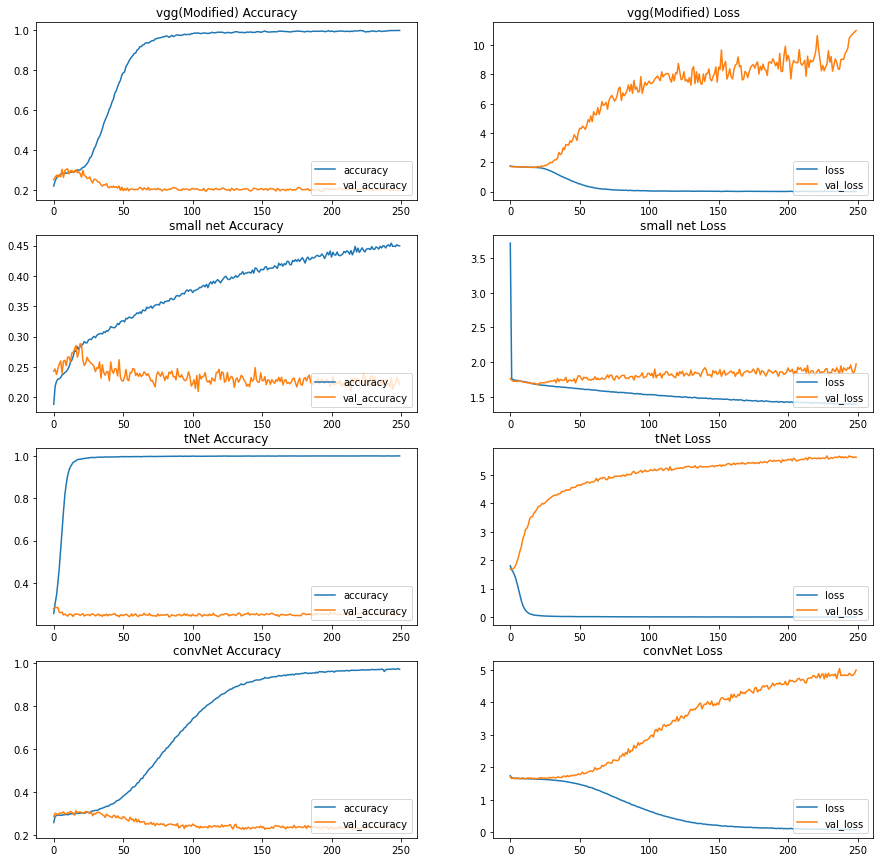

In [24]:
fig, axs = plt.subplots(4, 2, figsize=(15, 15))
i = 0
name = ['vgg(Modified)', 'small net', 'tNet', 'convNet']
for history in [vggResults, smallResults, tNetResults, convNetResults]:
    axs[i, 0].set_title(name[i]+" Accuracy", fontsize=12)
    axs[i, 0].plot(history.history['accuracy'], label='accuracy')
    axs[i, 0].plot(history.history['val_accuracy'], label = 'val_accuracy')
    #axs[i, 0].xlabel('Epoch')
    #axs[i, 0].ylabel('Accuracy')
    #axs[i, 0].ylim([0.5, 1])
    axs[i, 0].legend(loc='lower right')

    axs[i, 1].set_title(name[i]+" Loss", fontsize=12)
    axs[i, 1].plot(history.history['loss'], label='loss')
    axs[i, 1].plot(history.history['val_loss'], label = 'val_loss')
    #axs[i, 1].xlabel('Epoch')
    #axs[i, 1].ylabel('Loss')
    #axs[i, 1].ylim([0.0, 4.0])
    axs[i, 1].legend(loc='lower right')
    i = i + 1
